## Topic Modelling with LDA

In [2]:
# Import libraries
import pandas as pd

# Import libraries for visualisation
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
#pyLDAvis documentation: 1) https://pyldavis.readthedocs.io/en/latest/readme.html; 2) https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf
from wordcloud import WordCloud

# Import libraries for Topic Modelling
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from nltk.tokenize import word_tokenize
from gensim.models.coherencemodel import CoherenceModel
import en_core_web_md # download python -m spacy download en_core_web_sm
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

In [ ]:
# Convert data to a DataFrame
df = pd.read_csv("../data/Kyivpost.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  478 non-null    int64  
 1   title       478 non-null    object 
 2   date_str    478 non-null    object 
 3   siteName    478 non-null    object 
 4   text        478 non-null    object 
 5   sentiment   478 non-null    float64
 6   pageUrl     478 non-null    object 
 7   author      478 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 30.0+ KB


In [5]:
#Run a spaCy's pre-trained model
nlp = en_core_web_md.load()

In [6]:
#Remove stopwords 
removal=['PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

In [7]:
#Tokenize
tokens = []
for string in nlp.pipe(df['text']):
    proj_tok = [token.lemma_.lower() for token in string 
                if token.pos_ not in removal and 
                not token.is_stop and 
                (token.is_alpha or token.like_num)]  # Keep tokens that are alphabetic or numeric
    tokens.append(proj_tok)

In [ ]:
# Print out tokens
df['tokens'] = tokens
df['tokens']

In [9]:
#Create a dictionary, giving each token a unique ID
dictionary = Dictionary(df['tokens'])

In [ ]:
#Print out the dictionary
print(dictionary.token2id)

In [11]:
#Filter out low-frequency (in less than 5 texts) and high-frequency (in more than 50% of texts) tokens, keep all most frequent tokens
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=None)

In [12]:
#Create a corpus
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

In [13]:
#Build a model with LDA that represents topics as word probabilities clustering them based on their co-occurrence in a respective document
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary,iterations=50, num_topics=10, workers = 7, passes=10, random_state=100)

In [14]:
#Calculate the Coherence Score using UMass to measure the degree of semantic similarity between high scoring words in each topic
topics = []
score = [] 
for i in range(1,20,1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 7, passes=10, random_state=100)   
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass') 
    topics.append(i) 
    score.append(cm.get_coherence())

In [15]:
#Print out the Coherence Score with UMass measure for a certain number of topics
cm = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence="u_mass")
coherence_lda = cm.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -1.529327265710598


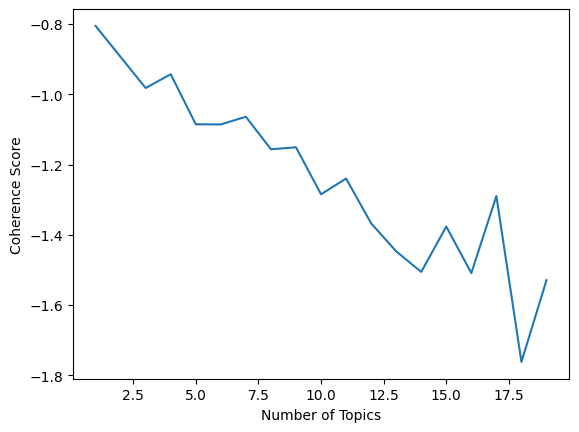

In [16]:
#Visualize the Coherence Score with UMass measure
plt.plot(topics,score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [17]:


#Calculate the Coherence Score using c_v measure. The highest Coherence Score gives the optimal number of meaningful and interpretable topics
topics = []
score = []
for i in range(1,20,1):   
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 7, passes=10, random_state=100)   
    cm = CoherenceModel(model=lda_model, texts = df['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')   
    topics.append(i)
    score.append(cm.get_coherence())

In [18]:
#Print out the Coherence Score with c_v measure for a certain number of topics
coherence_lda_cv = cm.get_coherence()
print('\nCoherence Score: ', coherence_lda_cv)


Coherence Score:  0.42039912113879074


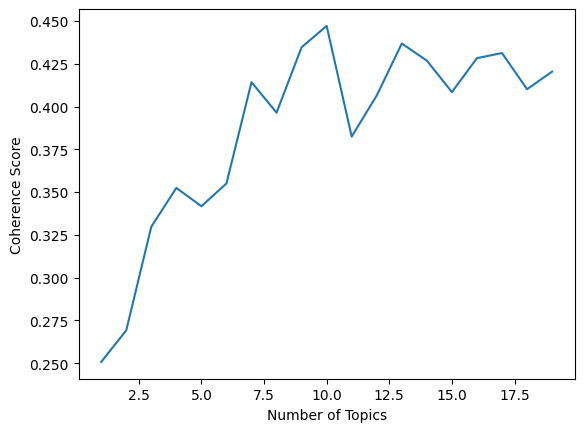

In [19]:
#Visualize the Coherence Score with c_v measure
plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [20]:
#Run a model with 100 iterations for more precise results
# NOTE for Euronews: num_topics=11; for KyivPost: num_topics=12
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=12, workers = 7, passes=100, random_state=100)

In [21]:
#Print out the topics with 10 most frequent keywords
lda_model.print_topics(num_topics=-1, num_words=30)

[(0,
  '0.014*"gas" + 0.009*"damage" + 0.009*"water" + 0.009*"nuclear" + 0.009*"energy" + 0.008*"plant" + 0.008*"supply" + 0.007*"power" + 0.007*"oil" + 0.006*"sanction" + 0.006*"europe" + 0.006*"cause" + 0.006*"stream" + 0.006*"percent" + 0.005*"pipeline" + 0.005*"nord" + 0.005*"new" + 0.005*"serbia" + 0.005*"european" + 0.005*"iran" + 0.005*"accord" + 0.005*"region" + 0.004*"report" + 0.004*"mariupol" + 0.004*"world" + 0.004*"large" + 0.004*"sea" + 0.004*"result" + 0.004*"natural" + 0.004*"moscow"'),
 (1,
  '0.014*"biden" + 0.013*"zelensky" + 0.008*"tell" + 0.007*"theater" + 0.006*"house" + 0.006*"film" + 0.006*"world" + 0.006*"visit" + 0.005*"minister" + 0.005*"aid" + 0.005*"summit" + 0.004*"foreign" + 0.004*"iran" + 0.004*"help" + 0.004*"february" + 0.004*"leader" + 0.004*"director" + 0.004*"work" + 0.004*"week" + 0.004*"event" + 0.003*"money" + 0.003*"united" + 0.003*"government" + 0.003*"joe" + 0.003*"turkey" + 0.003*"white" + 0.003*"new" + 0.003*"global" + 0.003*"volodymyr" + 0.

In [22]:
#Check topics in one text with their percentage
lda_model[corpus][1]

[(2, 0.11207006), (3, 0.8740073)]

In [23]:
#Visualize the topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

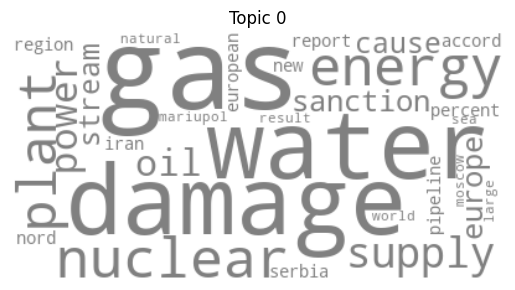

In [24]:
# Visualize the keywords in a word cloud
cloud_topic=0
desired_color_rgb = (128, 128, 128)

def single_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return desired_color_rgb

# Generate word cloud for the desired topic
plt.figure()

wc = WordCloud(collocations=False, background_color="white", max_words=30, color_func=single_color_func)
wc.fit_words(dict(lda_model.show_topic(cloud_topic, 200)))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Topic " + str(cloud_topic))
plt.show()

In [25]:
#Create a new column for topics in a DataFrame
df['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(df['text']))]

In [ ]:
df.tail(5)

In [27]:
# Count a distribution of topics in texts
df.topic.value_counts()

topic
1     121
0     108
2      87
3      52
4      33
6      21
7      16
5      16
8      13
9       6
10      3
11      2
Name: count, dtype: int64